# Iris Data Preprocessing and Exploration

## Modules

In [18]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

## Utility Functions

In [19]:
def check_null_values(df):
    null_counts = df.isnull().sum()
    null_counts = null_counts[null_counts > 0]
    
    if null_counts.empty:
        print("No null values found in the dataframe.")
    else:
        print("Columns with null values:")
        for col, count in null_counts.items():
            print(f"{col}: {count}")

## Data Loading

In [20]:
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [25]:
iris_df['species'] = iris.target

species_mapping = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
iris_df['species'] = iris_df['species'].map(species_mapping)

label_encoder = LabelEncoder()
iris_df['species_encoded'] = label_encoder.fit_transform(iris_df['species'])

In [28]:
iris_df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_encoded
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [6]:
iris_df.to_csv("iris_original.csv", index=False)

## Data Preprocessing

### Handling Null Values

In [7]:
check_null_values(iris_df)

No null values found in the dataframe.


### Feature Normalization

In [29]:
scaler = MinMaxScaler()

iris_scaled = iris_df.copy()
iris_scaled[iris.feature_names] = scaler.fit_transform(iris_scaled[iris.feature_names])

In [30]:
iris_scaled.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_encoded
0,0.222222,0.625000,0.067797,0.041667,setosa,0
1,0.166667,0.416667,0.067797,0.041667,setosa,0
2,0.111111,0.500000,0.050847,0.041667,setosa,0
3,0.083333,0.458333,0.084746,0.041667,setosa,0
4,0.194444,0.666667,0.067797,0.041667,setosa,0


In [10]:
iris_scaled.to_csv("iris_scaled.csv", index=False)

### Data Encoding

In the Iris dataset, the target variable (`species`) is categorical, containing three classes: *setosa*, *versicolor*, and *virginica*. To prepare it for later use in machine learning algorithms, the `LabelEncoder` was applied to create a new column, `species_encoded`, which maps each species to a numeric value (`0, 1, 2`).

1. For K-Means Clustering:
K-Means is an unsupervised learning algorithm that groups data into clusters based on feature similarities. It does not require target labels for the clustering process, as it uses only the feature set to form groups. The `species_encoded` column is therefore not needed for the actual clustering, though it can be used afterwards to compare clusters with the true species labels. Since the goal is unsupervised grouping, one-hot encoding is unnecessary.

For Decision Tree Classifier:
Decision Trees can handle numerical representations of categorical variables directly. The `species_encoded` column provides the numeric form needed for training, allowing the tree to split on these values and learn decision rules. Unlike algorithms such as logistic regression or neural networks, Decision Trees do not require one-hot encoding for target labels.

In summary: By using `LabelEncoder` to create `species_encoded`, the target variable is already in a numeric format compatible with both K-Means (for evaluation) and Decision Trees, making one-hot encoding unnecessary.

## Data Exploration

### Summary Statistics

In [11]:
# Get summary statistics
summary_stats = iris_df.describe()
summary_stats

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Visualisations

#### Pairplot

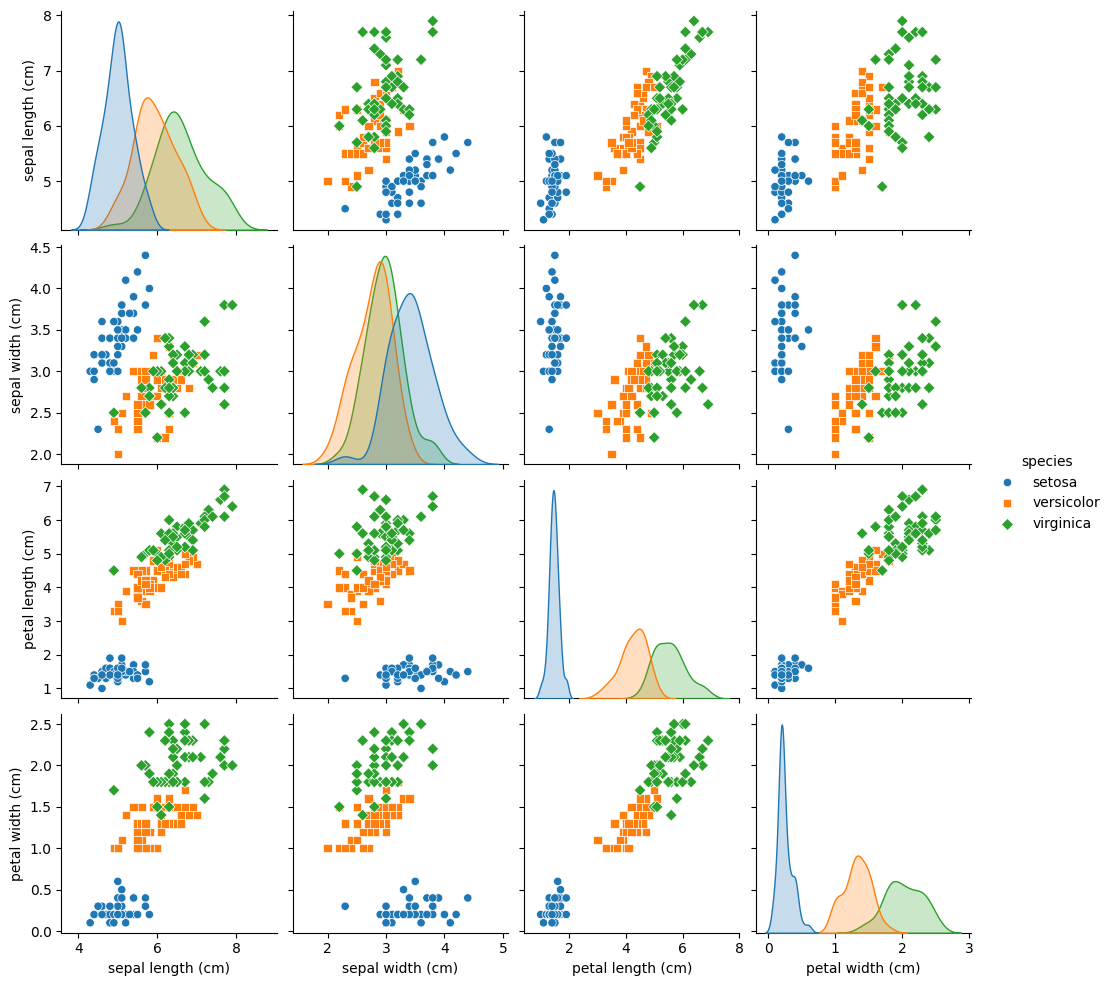

In [12]:
sns.pairplot(iris_df, hue='species', markers=["o", "s", "D"])
plt.savefig("pairplot_iris.png", dpi=300)
plt.show()

The pairplot of the Iris dataset provides both individual feature distributions and pairwise relationships among the four attributes — sepal length, sepal width, petal length, and petal width — across the three species. On the diagonal, the sepal length distribution curves show slight intersection between species, while sepal width exhibits substantial overlap. In contrast, petal length and petal width distributions clearly separate setosa from versicolor and virginica, which themselves overlap slightly. Off-diagonal scatter plots reinforce this pattern: points representing each species tend to form tight, distinct clusters, with minimal mixing between classes. The clearest separation appears in plots involving petal measurements, suggesting these are the most discriminative features for classification. This visualization supports feature selection by highlighting which measurements are most effective in distinguishing species, guiding both exploratory analysis and model development.

#### Heatmap

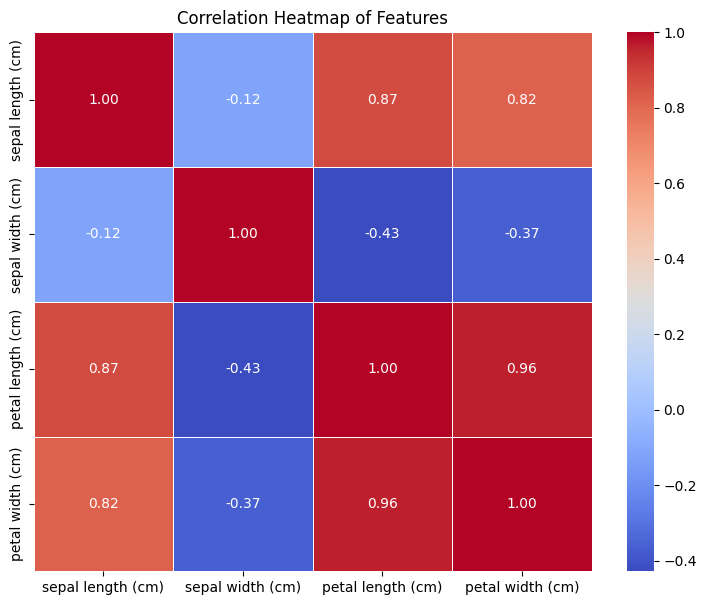

In [17]:
correlation_matrix = iris_df[iris.feature_names].corr()

plt.figure(figsize=(9, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.savefig("correlation_heatmap_iris.png", dpi=500)
plt.show()


The correlation heatmap for the Iris dataset quantifies the relationships among the four measured attributes: sepal length, sepal width, petal length, and petal width. As expected, the diagonal entries are all 1.0, reflecting perfect self-correlation. Among the off-diagonal values, the strongest positive relationship appears between petal length and petal width (0.96), indicating these features vary almost proportionally. Petal length also shows a high correlation with sepal length (0.87), followed by petal width with sepal length (0.82). These strong positive associations suggest potential redundancy, meaning models could use fewer features without substantial loss of information. In contrast, the remaining correlations — between sepal width and the other features — are negative and relatively weak (-0.12, -0.37, -0.43), implying little linear dependence. Such differences in correlation strength guide feature selection, helping to identify the most informative predictors for classification tasks.

#### Boxplot

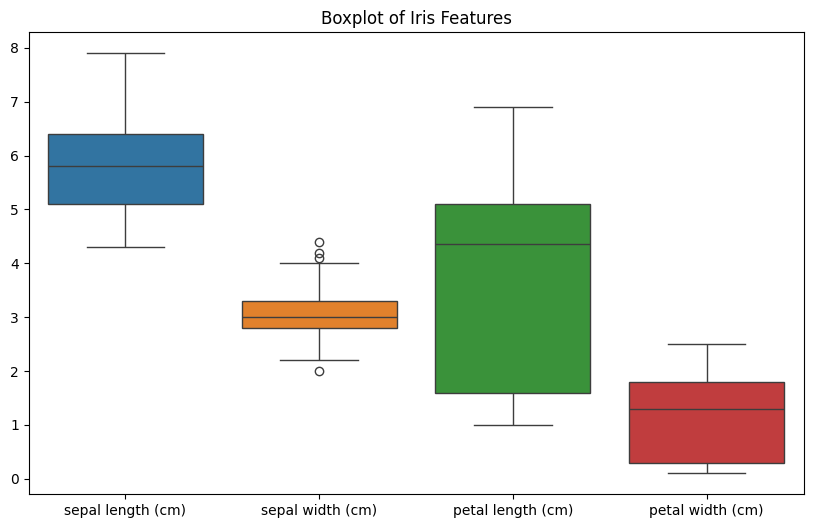

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=iris_df[iris.feature_names])
plt.title('Boxplot of Iris Features')
plt.savefig("boxplot_iris.png", dpi=300)
plt.show()

The box plot visualisation for the four Iris attributes — sepal length, sepal width, petal length, and petal width — highlights both data distribution and the presence of outliers. Sepal width is the only attribute showing outliers, suggesting occasional extreme measurements that deviate from the typical range. For sepal length, the median line appears centrally within the box, indicating a relatively symmetric distribution. In contrast, both petal length and petal width have their medians positioned closer to the upper edge of the box, reflecting a slight skew towards lower values. This plot not only provides a quick check for irregularities in the data but also hints at potential transformations or preprocessing steps if models sensitive to skew or outliers are to be applied.

## Data Splitting

In [15]:
def split_data(X, y, test_size=0.2, random_state=42):
    """
    Splits the data into training and test sets (default 80/20 split).

    Parameters:
    - X: Features (independent variables)
    - y: Target (dependent variable)
    - test_size: Proportion of the dataset to include in the test split (default is 0.2)
    - random_state: Seed for random number generator (default is 42 for reproducibility)

    Returns:
    - X_train, X_test, y_train, y_test: Split datasets
    """
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test